In [2]:
from google.colab import drive
drive.mount("/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression as LR

In [70]:
data = pd.read_csv("/gdrive/My Drive/문화관광공모전/데이터_처리/subway.csv", encoding='utf-8', na_values=' ')
data = data.fillna(0)
data.head()

,Unnamed: 0,기간,자치구,승하차 평균
0,0,2011년01월,강남구,9686.9
1,1,2011년02월,강남구,9022.7
2,2,2011년03월,강남구,10448.3
3,3,2011년04월,강남구,10207.6
4,4,2011년05월,강남구,9677.4


In [64]:
region = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', 
          '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

print(len(region))

25


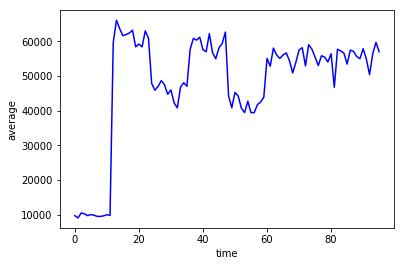

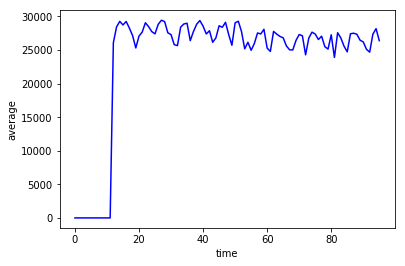

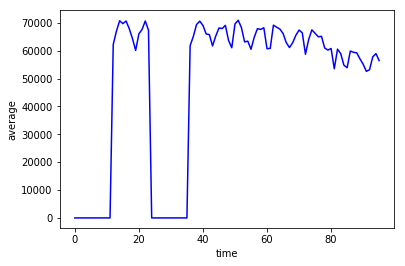

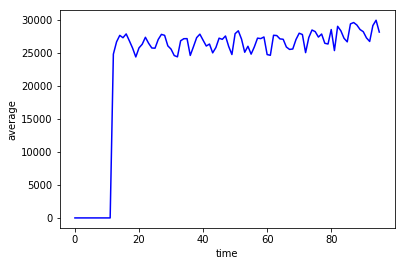

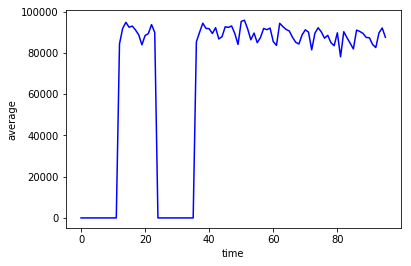

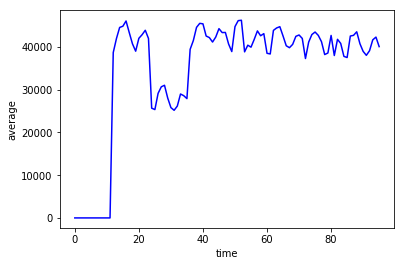

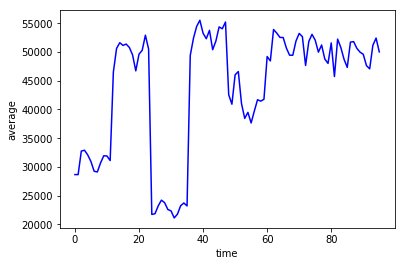

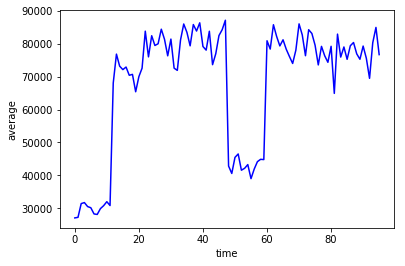

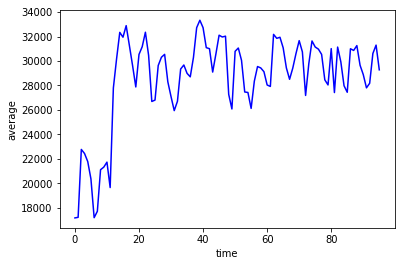

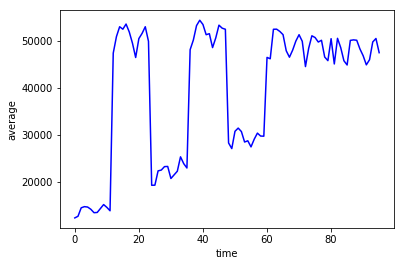

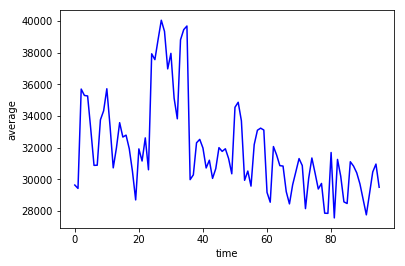

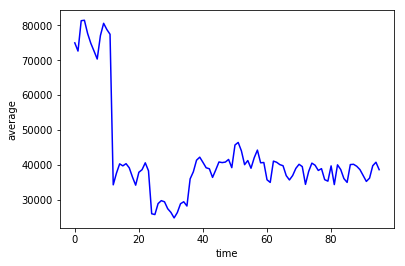

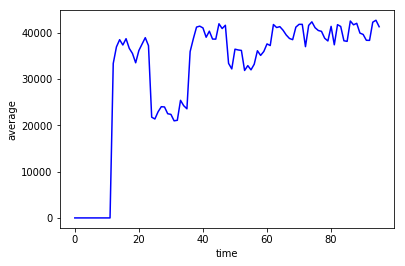

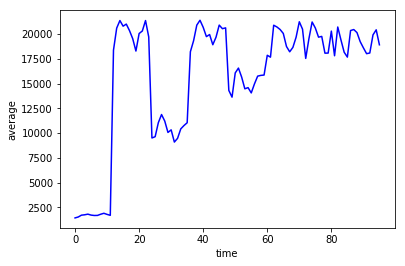

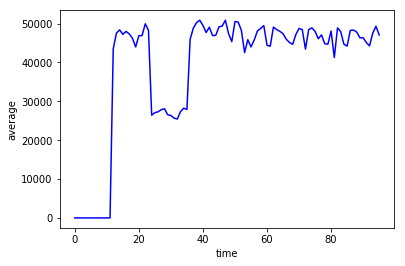

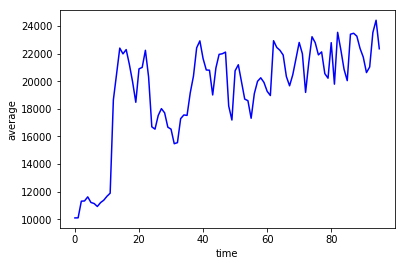

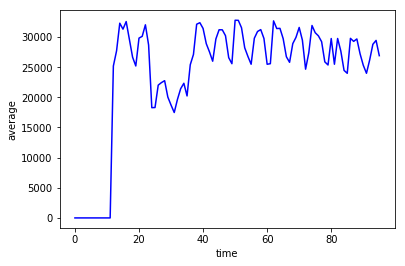

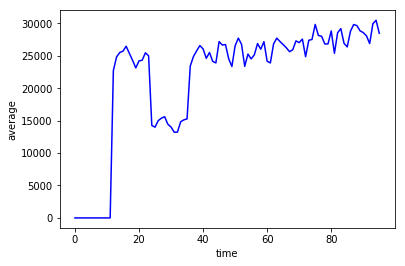

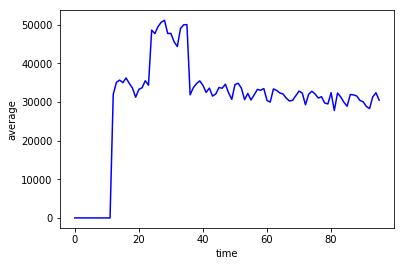

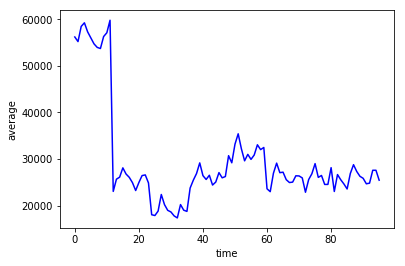

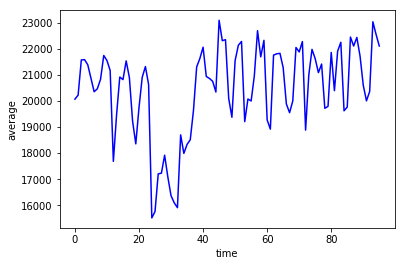

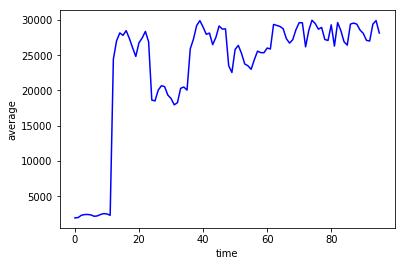

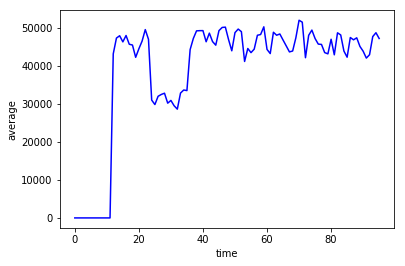

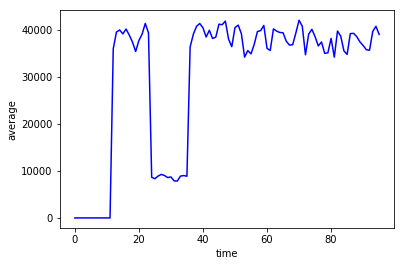

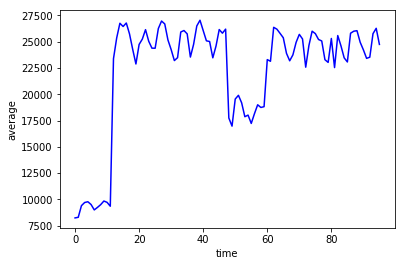

In [65]:
time = np.arange(0, 96).reshape(-1, 1)
rate = []

for i in range(len(region)):
    lr = LR()
    
    plt.figure()
    
    tmp = data[data['자치구'] == region[i]]
    avg = tmp['승하차 평균']
    avg.fillna(0)
    
    plt.plot(time, avg, 'b')
    lr = lr.fit(time, avg)
    rate.append(lr.coef_[0])
    
    plt.xlabel('time')
    plt.ylabel('average')
    
    plt.show()

In [66]:
rate

[294.2178520075963,
 167.40435227889313,
 549.9435770482909,
 199.76197843190457,
 841.459346174715,
 308.7801458220293,
 203.95331389039612,
 313.951457542051,
 64.43619641888226,
 280.15508749321754,
 -54.47244302767227,
 -230.03917661421607,
 339.81833016820394,
 138.47981890938686,
 373.52378594682574,
 91.77436991318503,
 206.77941535539884,
 245.53640328269134,
 142.18909997287028,
 -180.2685146500271,
 20.410070537167666,
 207.32338714053176,
 356.3160906131308,
 338.932925257732,
 94.38791372761801]

In [68]:
df = pd.DataFrame(data={'지역': region, '지하철 승하차수 평균': rate}, columns=['지역', '지하철 승하차수 평균'])
df

,지역,지하철 승하차수 평균
0,강남구,294.217852
1,강동구,167.404352
2,강북구,549.943577
3,강서구,199.761978
4,관악구,841.459346
5,광진구,308.780146
6,구로구,203.953314
7,금천구,313.951458
8,노원구,64.436196
9,도봉구,280.155087
